In [1]:
import pandas as pd

In [2]:
df=pd.read_excel("SentimentAnalysis.xlsx")

In [3]:
df.sample(5)

,Comments Text
6516,I survive by thinking every day is a different...
5005,"My bad when it said ""bipolar/depression/anxiet..."
3365,"You are amazing, your struggle is real and you..."
4036,"I'm the same way , it was so bad that I paid s..."
1230,"If your scared and you think its time to go, t..."


In [4]:
import matplotlib.pyplot as plt

In [5]:
from wordcloud import WordCloud

In [6]:

txt="".join(item.lower() for item in df["Comments Text"])

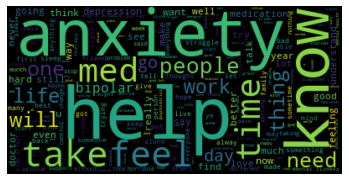

In [7]:
wordcloud=WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords,opinion_lexicon
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
stopword=stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
lem=WordNetLemmatizer()

In [10]:
len(stopword)

179

In [11]:
import re
def remove(x):
    x=re.sub("[^A-z" "]+"," ",x)
    s=""
    for i in x.split():
        if i not in stopword:
            i=lem.lemmatize(word=i)
            s=s+" "+i
    return s

In [12]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
df["Comments_clean"]=df["Comments Text"].apply(remove)
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,Comments Text,Comments_clean
0,"So, when you ask what the two illnesses are......",So ask two illness similar tend moodiness inv...
1,"In addition, people with BPD quite often have ...",In addition people BPD quite often weak self ...
2,"Borderline Personality Disorder, like all othe...",Borderline Personality Disorder like personal...
3,LONG ANSWER: Bipolar disease is caused by a ch...,LONG ANSWER Bipolar disease caused chemical i...
4,Well think of bipolar as a rollar coaster you ...,Well think bipolar rollar coaster high low pe...


In [13]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 6.4 MB/s eta 0:00:00


In [14]:
vs=SentimentIntensityAnalyzer()

In [15]:
vs.emojis['😀']

'grinning face'

In [16]:
df["Comments_clean"]

0        So ask two illness similar tend moodiness inv...
1        In addition people BPD quite often weak self ...
2        Borderline Personality Disorder like personal...
3        LONG ANSWER Bipolar disease caused chemical i...
4        Well think bipolar rollar coaster high low pe...
                              ...                        
7140     Please contact SADAG south African depression...
7141     It gave severe ataxia ataxia People ataxia pr...
7142           I Caused muscle tense swelling weight gain
7143     Lamictal miracle med Only took year find righ...
7144     I take Wellbutrin topamax buspar antidepressa...
Name: Comments_clean, Length: 7145, dtype: object

In [17]:
vs.polarity_scores(df["Comments_clean"][3])

{'neg': 0.309, 'neu': 0.586, 'pos': 0.105, 'compound': -0.9905}

In [18]:
def polarity(sent):
    d=vs.polarity_scores(sent)
    #d.pop("compound")
    #val=sorted(d.items(),key=lambda x:x[1],reverse=True)[0][0]
    if d["compound"]>0.05:
        return "positive"
    elif d["compound"]<-0.05:
        return "negative"
    elif -0.05<=d["compound"]<=0.05:
        return "neutral"
    else:
        return "Check"

In [19]:
df["value"]=df["Comments_clean"].apply(polarity)
df.head()

,Comments Text,Comments_clean,value
0,"So, when you ask what the two illnesses are......",So ask two illness similar tend moodiness inv...,negative
1,"In addition, people with BPD quite often have ...",In addition people BPD quite often weak self ...,negative
2,"Borderline Personality Disorder, like all othe...",Borderline Personality Disorder like personal...,negative
3,LONG ANSWER: Bipolar disease is caused by a ch...,LONG ANSWER Bipolar disease caused chemical i...,negative
4,Well think of bipolar as a rollar coaster you ...,Well think bipolar rollar coaster high low pe...,negative


In [20]:
df.value.value_counts()

negative    4038
positive    2925
neutral      182
Name: value, dtype: int64

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
cv=CountVectorizer(lowercase=True)

In [23]:
data_array=cv.fit_transform(df.Comments_clean).toarray()
data_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn import preprocessing
from tqdm import tqdm
from keras.models import Sequential


In [25]:
import numpy as np
label_encoder = preprocessing.LabelEncoder()
labels = label_encoder.fit_transform(df['value'])
np.unique(labels)

array([0, 1, 2])

In [27]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [28]:
x,x_test,y,y_test=train_test_split(data_array,df.value,random_state=42,test_size=.1)

In [29]:
rf=RandomForestClassifier()

In [30]:
rf.fit(x,y)

RandomForestClassifier()

In [ ]:
accuracy_score(y_test,rf.predict(x_test))

0.779020979020979

In [33]:
mnb=MultinomialNB()
mnb.fit(x,y)
accuracy_score(y_test,mnb.predict(x_test))

0.7636363636363637

In [ ]:
df.to_csv("New_7k_clean_data.csv",index=False)